In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
df=pd.read_csv('twitter_validation.csv',encoding='ISO-8859-1',header=None)
df.columns=['id','social_media','target','reviews']

In [3]:
df.head()

,id,social_media,target,reviews
0,-3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df.tail()

,id,social_media,target,reviews
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [5]:
df.shape

(1000, 4)

In [6]:
df.dtypes

id               int64
social_media    object
target          object
reviews         object
dtype: object

In [7]:
df.isna().sum()

id              0
social_media    0
target          0
reviews         0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='social_media'>

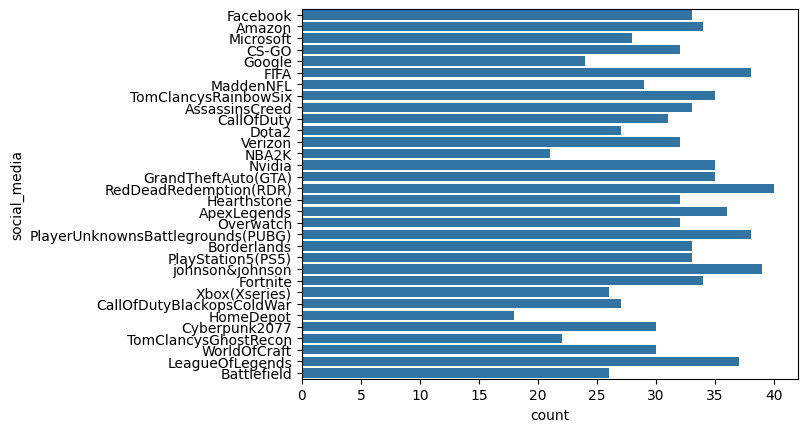

In [8]:
sns.countplot(df['social_media'])

In [9]:
x=df['target'].value_counts()
x

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<BarContainer object of 4 artists>

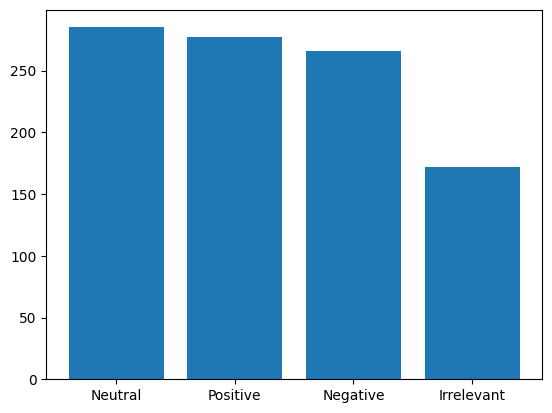

In [10]:
plt.bar(x.index,x)

In [11]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)
df

,id,social_media,target,reviews
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
#reset index (another method=ignore_index=true)
df.reset_index(drop=True,inplace=True)
df

,id,social_media,target,reviews
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
df.drop(['id','social_media'],inplace=True,axis=1)
df

,target,reviews
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
#negative     positive      neutral
#1               -1            0

df['target']=df['target'].map({'Negative':-1,'Positive':1,'Neutral':0})

In [15]:
df.dtypes

target      int64
reviews    object
dtype: object

In [16]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [17]:
#
tweets=df.reviews
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: reviews, Length: 828, dtype: object

In [18]:
#tokenization
#lambda===key word===apply 
#.apply(lambda x:" ".join(x)===== BBC,News,- Amazon,boss  ===change to==BBC News - Amazon boss 

from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: reviews, Length: 828, dtype: object

In [19]:
#special character remove
tweets=tweets.str.replace('[^a-zA-Z0-9]'," ",regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I      ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible   How can ...
824    Good on Sony   As much as I want to see the ne...
825    Today sucked so it      s time to drink wine n...
826    Bought a fraction of Microsoft today   Small w...
827    Johnson   Johnson to stop selling talc baby po...
Name: reviews, Length: 828, dtype: object

In [20]:
#meaning full word====> minimum 3 characters 
tweets=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: reviews, Length: 828, dtype: object

In [21]:
#stemming
from nltk.stem import SnowballStemmer
sp=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[sp.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: reviews, Length: 828, dtype: object

In [22]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop ]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: reviews, Length: 828, dtype: object

In [23]:
#vectorization
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data=tf.fit_transform(tweets)
data


<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

In [24]:
print(data)

  (0, 668)	0.2608257828483461
  (0, 982)	0.2608257828483461
  (0, 1108)	0.23509805002803952
  (0, 1976)	0.13277165480466424
  (0, 286)	0.22681557001542715
  (0, 838)	0.17354914655342313
  (0, 785)	0.21432663830218204
  (0, 2741)	0.2608257828483461
  (0, 545)	0.2608257828483461
  (0, 1813)	0.24577602391989378
  (0, 610)	0.22681557001542715
  (0, 353)	0.1515362387424402
  (0, 2267)	0.38864111655856126
  (0, 515)	0.49155204783978756
  (1, 775)	0.4055823664694651
  (1, 2871)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 1383)	0.4055823664694651
  (1, 3659)	0.36557591217188057
  (1, 2442)	0.3126902562590763
  (1, 3619)	0.26216072802580975
  (1, 2135)	0.24555654927912696
  (2, 1405)	0.1689251539717079
  (2, 463)	0.36574263611909275
  (2, 3412)	0.36574263611909275
  :	:
  (825, 3373)	0.3395996844494919
  (825, 3363)	0.2560582225152134
  (825, 608)	0.22981061112100945
  (825, 975)	0.2315686698425631
  (825, 3353)	0.21750175079084832
  (825, 3206)	0.2904718522758868
  (825, 2507)	0.17

In [25]:
y=df.target.values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier()
sv=SVC()
mn=BernoulliNB()
lst=[knn,sv,mn]
for i in lst:
    print('model is',i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('accuracy score is')
    print(accuracy_score(y_test,y_pred))
    print('classification report is')
    print(classification_report(y_test,y_pred))
    print('*'*100)



model is KNeighborsClassifier()
accuracy score is
0.4497991967871486
classification report is
              precision    recall  f1-score   support

          -1       0.39      0.80      0.53        79
           0       0.49      0.29      0.37        79
           1       0.63      0.29      0.39        91

    accuracy                           0.45       249
   macro avg       0.50      0.46      0.43       249
weighted avg       0.51      0.45      0.43       249

****************************************************************************************************
model is SVC()
accuracy score is
0.5783132530120482
classification report is
              precision    recall  f1-score   support

          -1       0.67      0.51      0.58        79
           0       0.46      0.76      0.57        79
           1       0.75      0.48      0.59        91

    accuracy                           0.58       249
   macro avg       0.62      0.58      0.58       249
weighted avg       0.

In [28]:
from sklearn.model_selection import GridSearchCV
model1=BernoulliNB()
